This script conducts validation tests on the full linear models for the Democratic primaries. I withhold one year at a time from the trianing data and then test on all elections from that year. I also create a new 'past_turnout' column for each validation model that does not incorporate the turnout from the year being tested. 

In [134]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [135]:
#Download data
#Read in data and filter out test data
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")



#filter out 2018 data
turnout_train_dem_use = turnout_train_dem[turnout_train_dem['Year'] != 2018]





R^2:  0.7988588835696726
Mean Absolute Error (MAE): 2.328478894680572
Mean Squared Error (MSE): 10.155876840221321


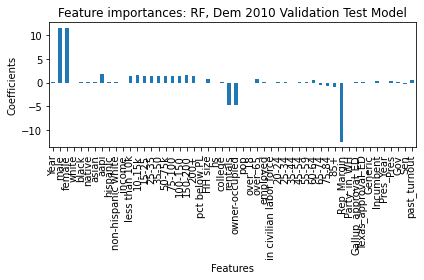

In [136]:
#Validation Test: 2010
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2010.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2010)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2010 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2010]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF, Dem 2010 Validation Test Model")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()


In [137]:
#Test 2010 gov

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2010_Dem_Gov']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.38797513338374345
Mean Absolute Error (MAE): 5.169190790634477
Mean Squared Error (MSE): 63.865645045658


R^2:  0.7476387382353407
Mean Absolute Error (MAE): 2.9832456710764688
Mean Squared Error (MSE): 16.507962876905413


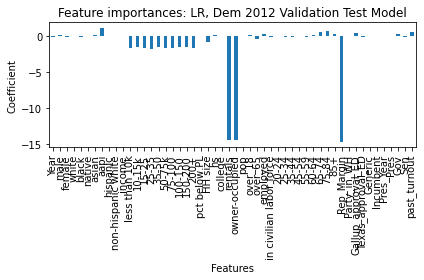

In [138]:
#Validation Test: 2012
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2010.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2012)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2012 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2012]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: LR, Dem 2012 Validation Test Model")
plt.ylabel("Coefficient")
plt.xlabel("Features")
fig.tight_layout()

In [139]:
#Test 2012 sen

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2012_Dem_Sen']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.39151916770090467
Mean Absolute Error (MAE): 4.12174078252166
Mean Squared Error (MSE): 23.996044198445798


In [140]:
#Test 2012 pres

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2012_Dem_Pres']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.62489522866765
Mean Absolute Error (MAE): 4.052438948731436
Mean Squared Error (MSE): 24.47929327111662


R^2:  0.7650411085344371
Mean Absolute Error (MAE): 2.924345811721211
Mean Squared Error (MSE): 16.457055971461433


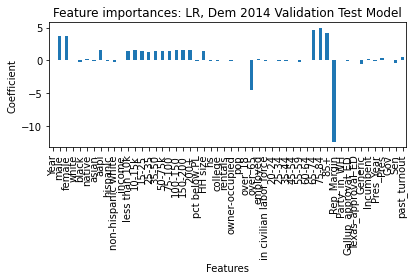

In [141]:
#Validation Test: 2014
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2014.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2014)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2016 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2014]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: LR, Dem 2014 Validation Test Model")
plt.ylabel("Coefficient")
plt.xlabel("Features")
fig.tight_layout()

In [142]:
#Test 2014 gov

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2014_Dem_Gov']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.21120302986592066
Mean Absolute Error (MAE): 4.9563178600824145
Mean Squared Error (MSE): 35.38747783193026


In [143]:
#Test 2014 sen

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2014_Dem_Sen']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.0533743121039999
Mean Absolute Error (MAE): 4.821241406965856
Mean Squared Error (MSE): 34.50143847511095


R^2:  0.7637054617183541
Mean Absolute Error (MAE): 2.72516560245006
Mean Squared Error (MSE): 14.452993521763968


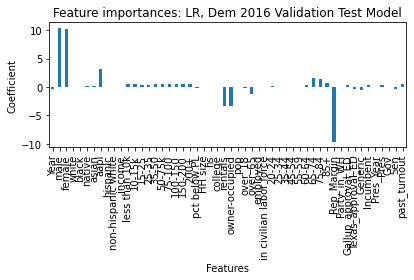

In [144]:
#Validation Test: 2016 
np.random.seed(5)

turnout_train_dem_mod = turnout_train_dem_use

#create df for average of past turnout, except for 2018 and 2016.
history_dem = pd.read_csv('history_dem.csv')

history_dem = history_dem[(history_dem['Year'] != 2018) & (history_dem['Year'] != 2016)]
turnout_train_dem_record = history_dem[['Turnout', 'County']]
historical_dem = turnout_train_dem_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2016 in the means
turnout_train_dem_mod = turnout_train_dem_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2010 from testing data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2016]

#extract feats and outcomes
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: LR, Dem 2016 Validation Test Model")
plt.ylabel("Coefficient")
plt.xlabel("Features")
fig.tight_layout()

In [145]:
#Test 2016 pres

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2016 in the means
turnout_train_dem_mod = turnout_train_dem_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_dem_mod = turnout_train_dem_mod.merge(historical_dem['Turnout'], on = 'County')
#rename columns
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_dem_mod = turnout_train_dem_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2016_Dem_Pres']

#specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_dem_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.5203631124392449
Mean Absolute Error (MAE): 4.300790434125129
Mean Squared Error (MSE): 28.924498680102854
